# This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

#### https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

### Import of libraries needed for loading datasets

### Data preprocessing and Cleansing

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### This is to check the columns if there are some missing values, special characters and the uniqueness of the values

In [4]:
for a in df.columns:
    print(a, df[a].unique())

Gender ['Female' 'Male']
Age [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Height [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Weight [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
family_history_with_overweight ['yes' 'no']
FAVC ['no' 'yes']
FCVC [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.

In [5]:
df.isnull().values.any()

False

#### Now we take a look at each feature data distribution.

In [6]:
mask = df.dtypes == float
float_list = df.columns[mask]
print(float_list)
mask = df.dtypes == object
obj_list = df.columns[mask]
print(obj_list)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Age


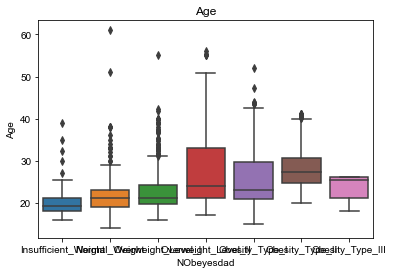

Height


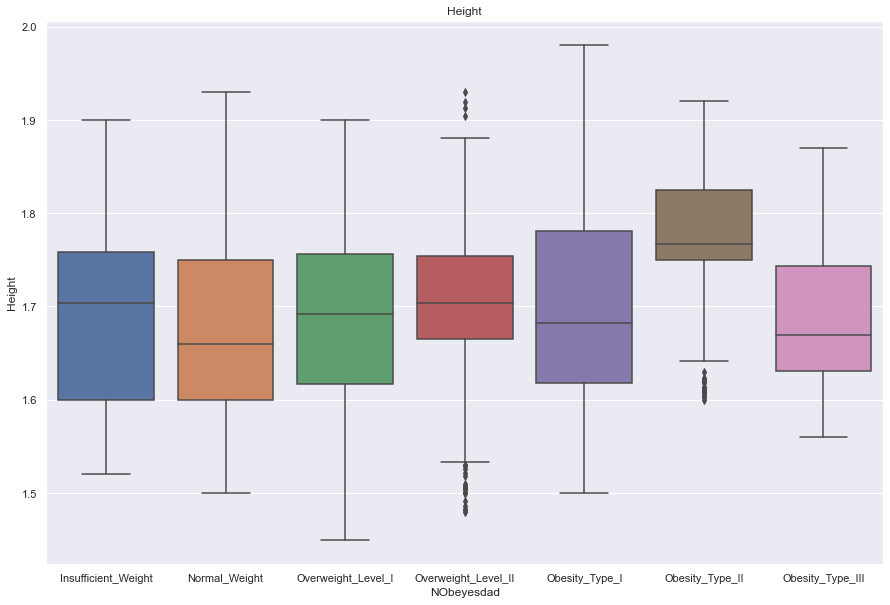

Weight


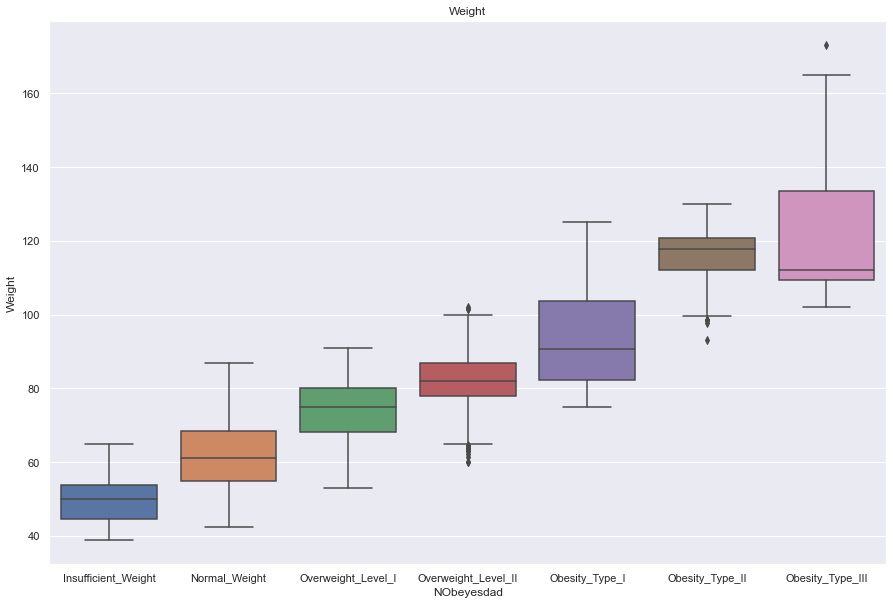

FCVC


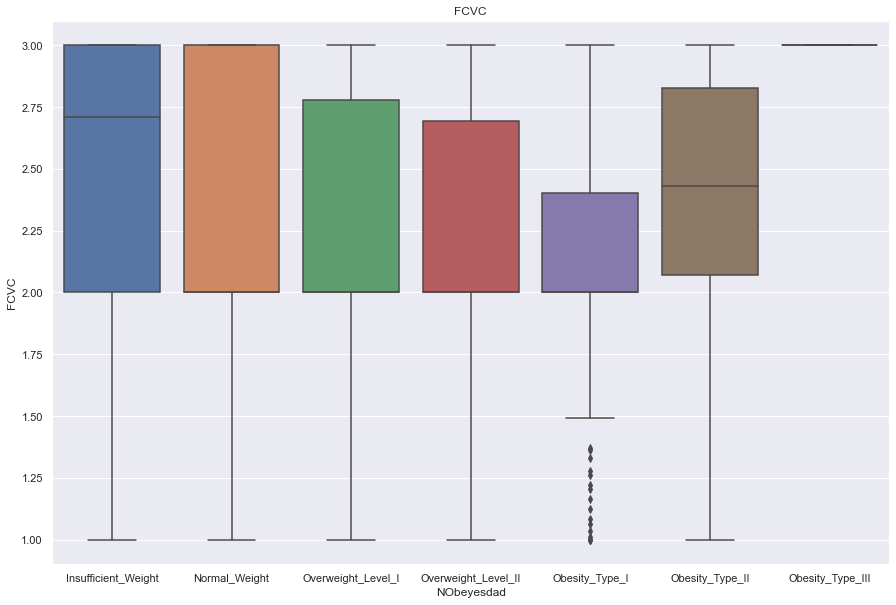

NCP


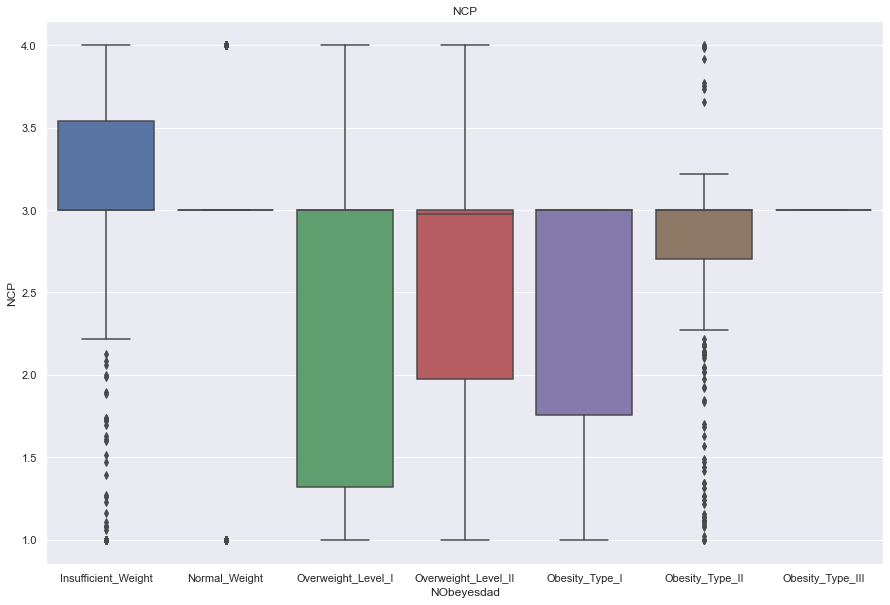

CH2O


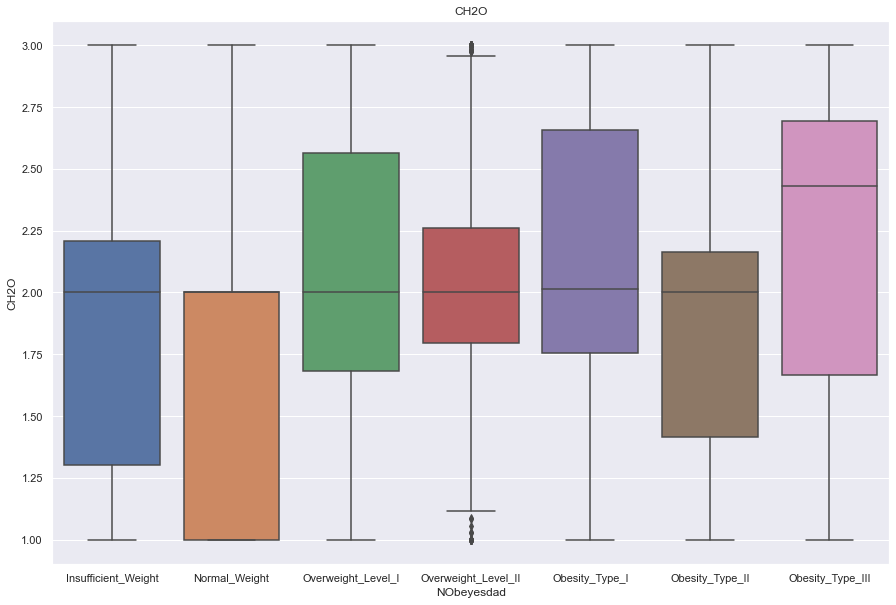

FAF


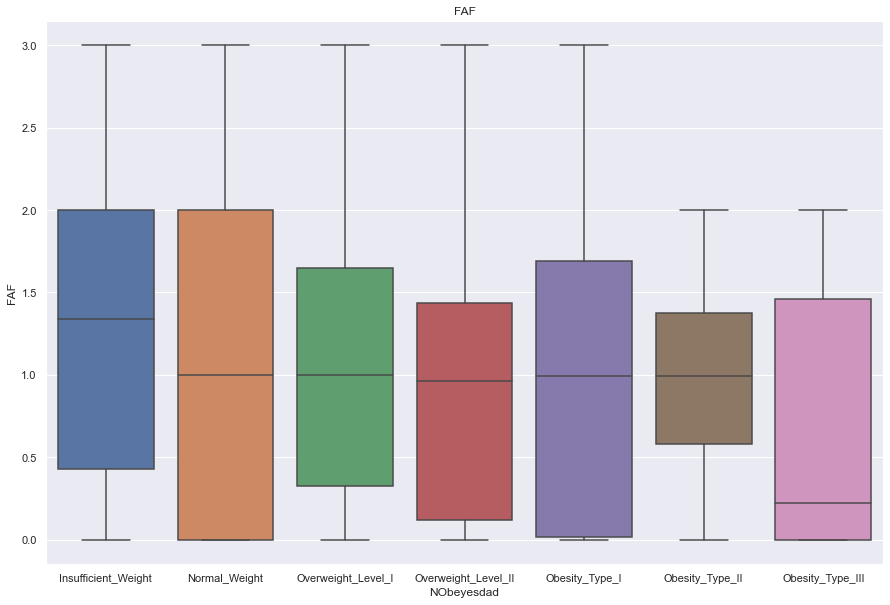

TUE


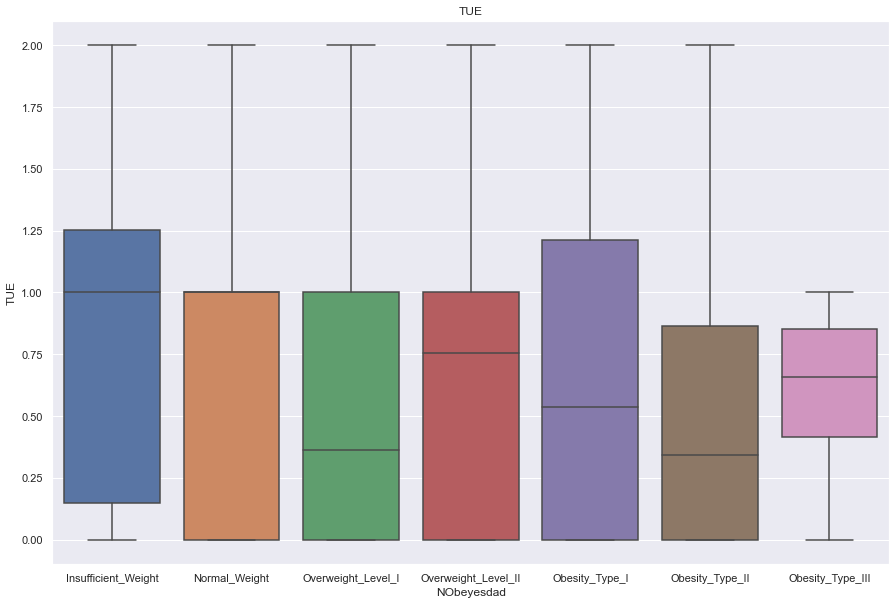

In [8]:
for a in float_list:
    print(a)
    sns.boxplot(x='NObeyesdad',y=a ,data=df, order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
                                                     'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                                                     'Obesity_Type_III'])
    sns.set(rc={'figure.figsize':(15,10)})
    plt.title(a)
    plt.show()

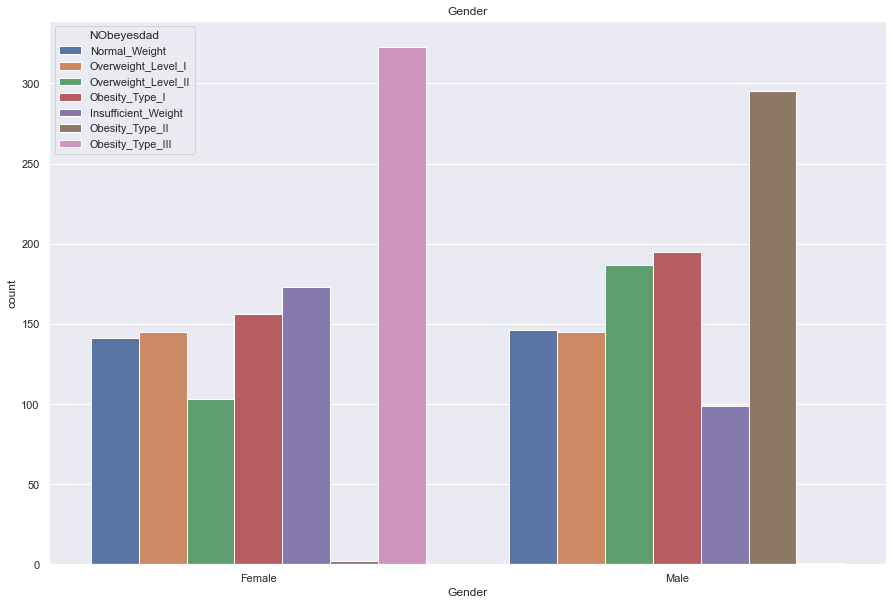

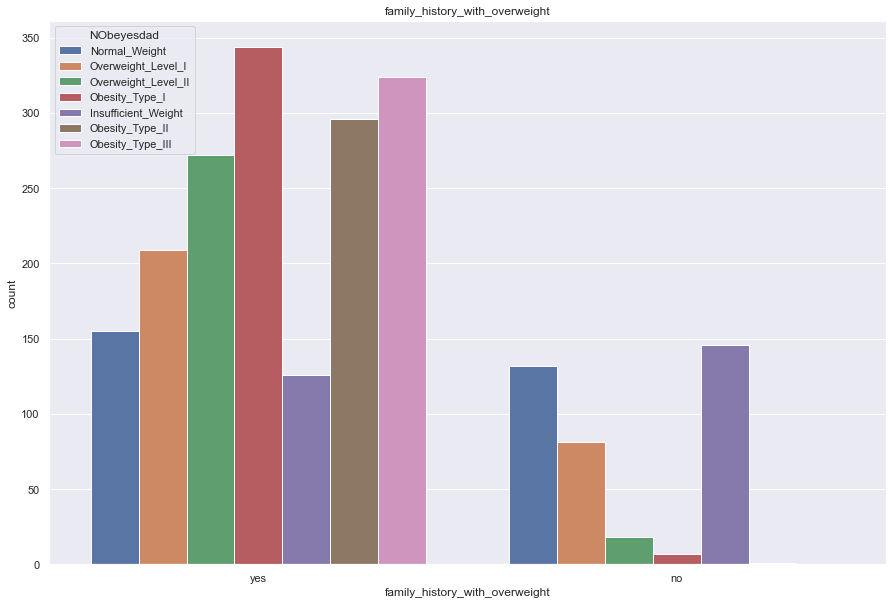

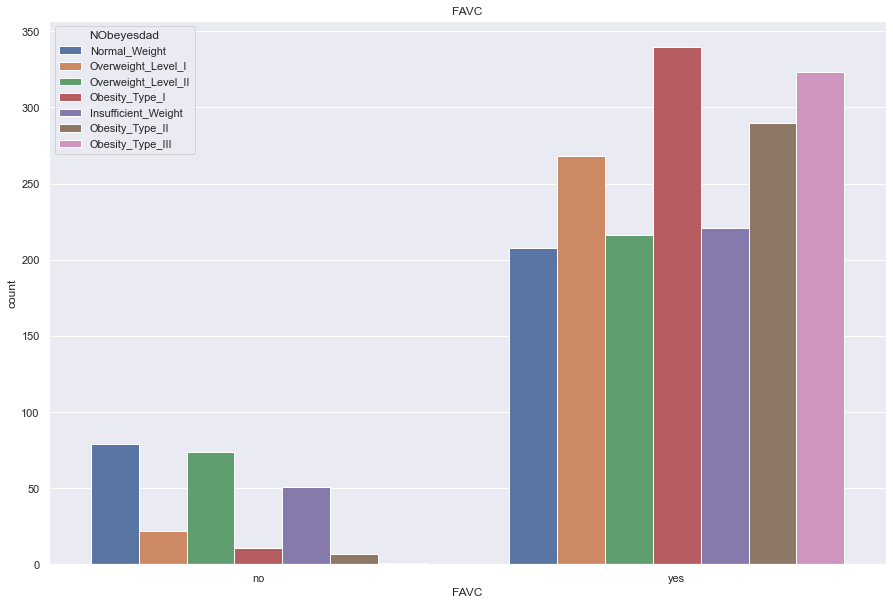

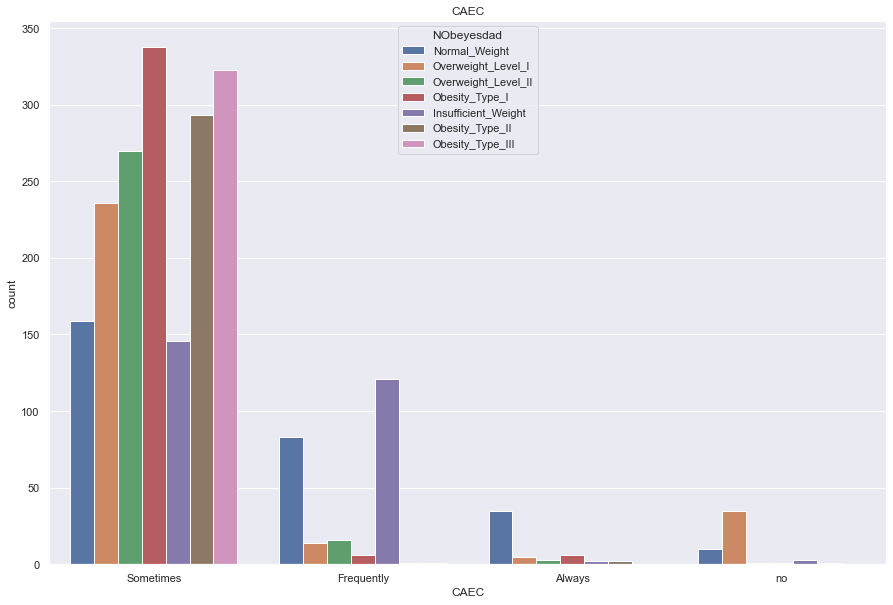

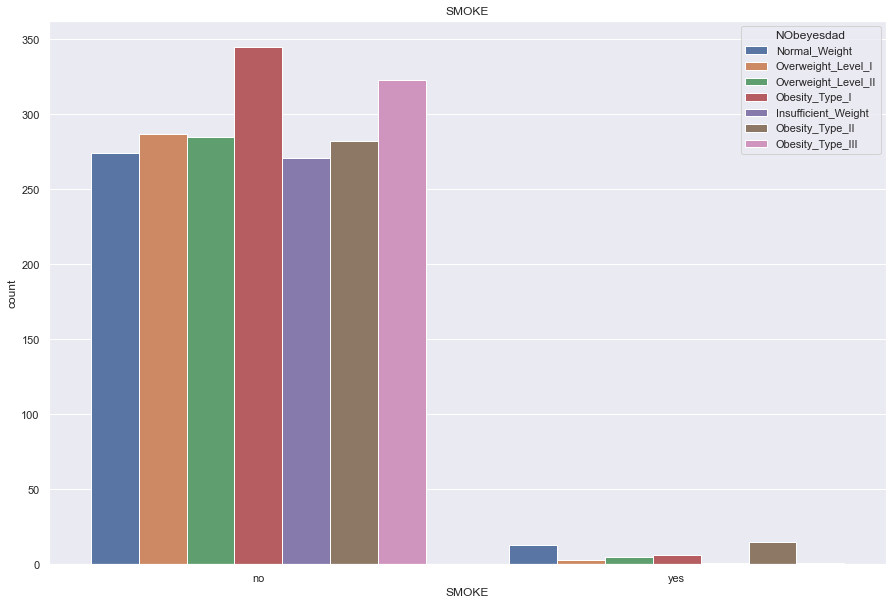

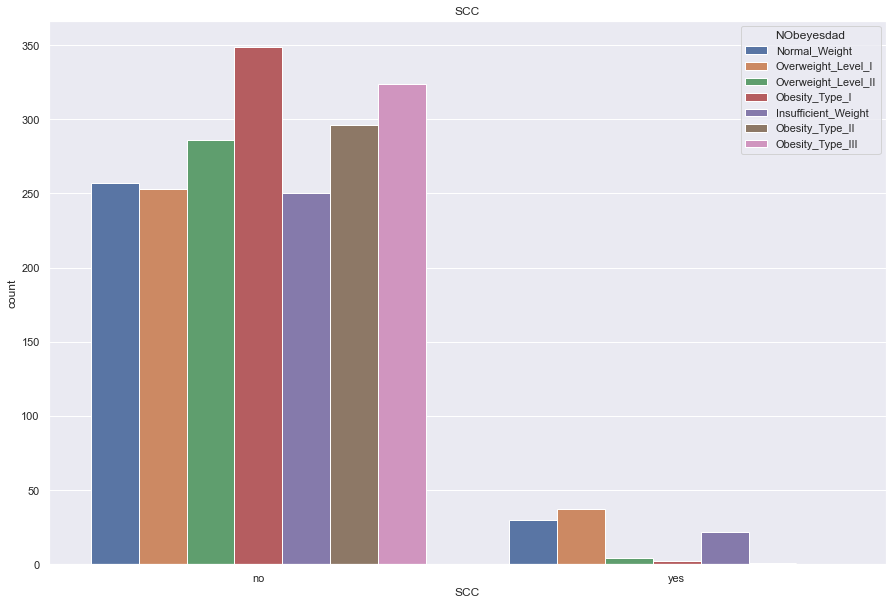

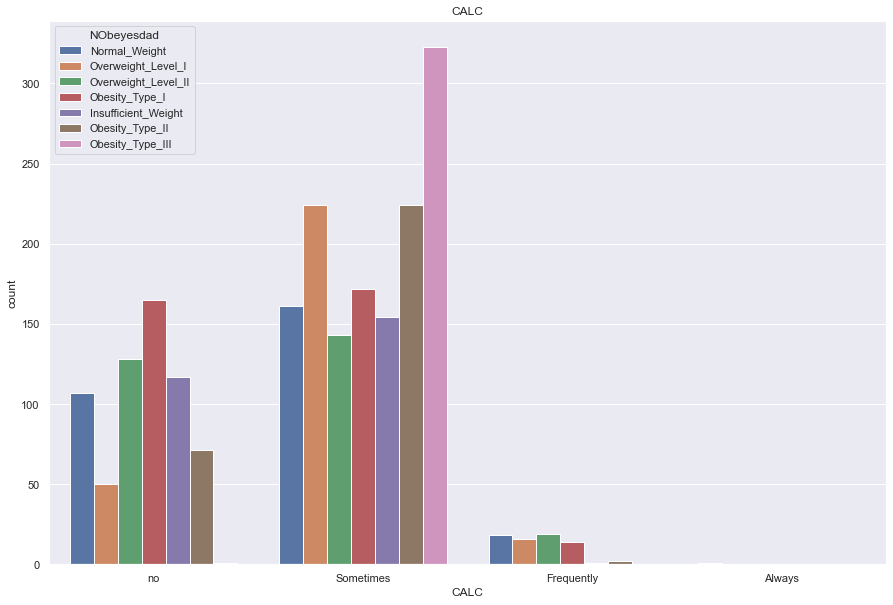

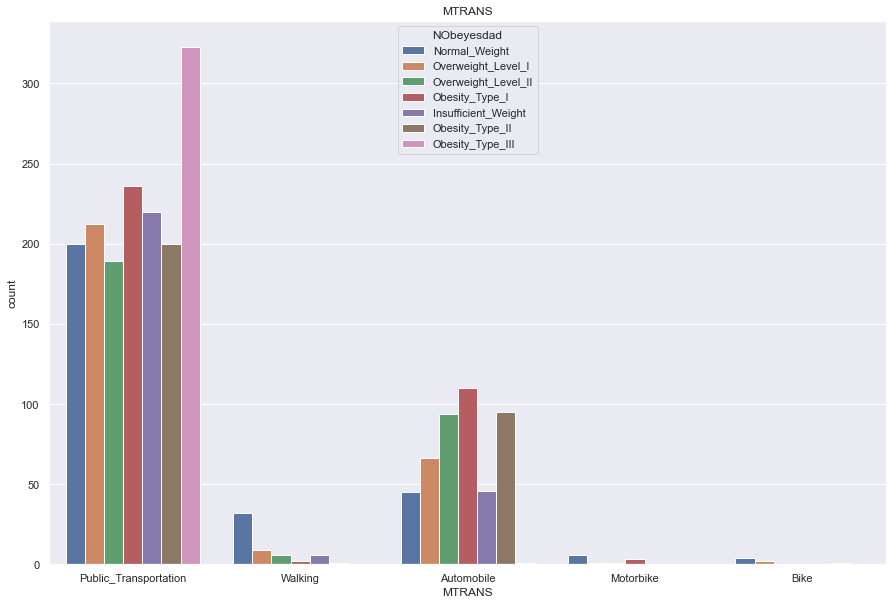

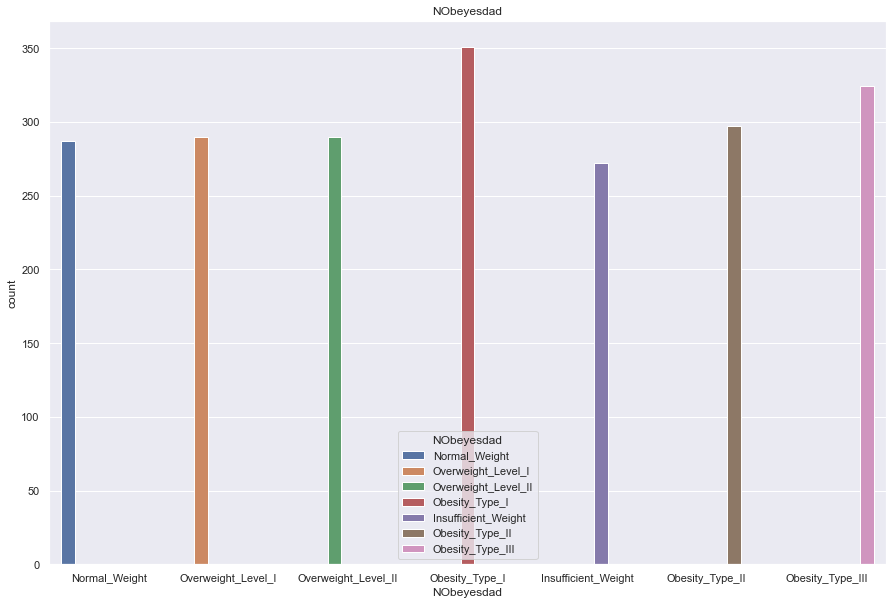

In [9]:
for a in obj_list:
    sns.countplot(x=a,hue='NObeyesdad',data=df)
    sns.set(rc={'figure.figsize':(15,10)})
    plt.title(a)
    plt.show()

In [10]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

#### There a few features that are in object(Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS and the NObeyesdad. Need to convert those into numbers

#### Base on above unique code, easily to be replace are Gender, family_history_with_overweight, FAVC, SMOKE and SCC. It is either yes or no, female or male.

In [11]:
df.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.family_history_with_overweight.replace({'no': 0, 'yes': 1}, inplace=True)
df.FAVC.replace({'no': 0, 'yes': 1}, inplace=True)
df.SMOKE.replace({'no': 0, 'yes': 1}, inplace=True)
df.SCC.replace({'no': 0, 'yes': 1}, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Next feature need to cleanup are CAEC, CALC and MTRANS. This features have multiple labels.

In [12]:
df.CAEC.replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}, inplace=True)
df.CALC.replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}, inplace=True)
df.MTRANS.replace({'Walking': 0, 'Public_Transportation': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4}, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,Overweight_Level_II


#### The last feature need to be cleanup is the NObeyesdad which is also the classification category.

In [13]:
df.NObeyesdad.value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

#### Check the value count of each int64 data type

In [14]:
mask = df.dtypes == np.int64
int64_list = df.columns[mask]
print(int64_list)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [15]:
for a in int64_list:
    print(df[a].value_counts())

1    1068
0    1043
Name: Gender, dtype: int64
1    1726
0     385
Name: family_history_with_overweight, dtype: int64
1    1866
0     245
Name: FAVC, dtype: int64
1    1765
2     242
3      53
0      51
Name: CAEC, dtype: int64
0    2067
1      44
Name: SMOKE, dtype: int64
0    2015
1      96
Name: SCC, dtype: int64
1    1401
0     639
2      70
3       1
Name: CALC, dtype: int64
1    1580
2     457
0      56
3      11
4       7
Name: MTRANS, dtype: int64


#### The CALC feature have a category which has one entry only. We will delete this row.

In [16]:
df.loc[df['CALC'] == 3]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
26,1,21.0,1.7,65.0,1,1,2.0,1.0,2,0,2.0,0,1.0,2.0,3,0,Normal_Weight


#### The MTRANS feature have a category which is very few also. Category 3 and 4, which we suggest to change it to category 0. Meaning category 0 will be Walking/Motorbike/Bike

In [17]:
df.loc[df['MTRANS'] == 3]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,3,Normal_Weight
30,1,29.0,1.77,83.0,0,1,1.0,4.0,2,0,3.0,0,0.0,1.0,0,3,Overweight_Level_I
137,1,44.0,1.60,80.0,1,0,2.0,3.0,1,1,3.0,0,0.0,0.0,0,3,Obesity_Type_I
273,1,25.0,1.71,71.0,1,1,2.0,3.0,2,0,2.0,0,0.0,0.0,1,3,Normal_Weight
365,1,24.0,1.70,68.0,0,1,3.0,3.0,1,0,2.0,0,0.0,0.0,1,3,Normal_Weight
380,1,25.0,1.70,83.0,0,1,3.0,3.0,1,0,3.0,1,3.0,0.0,0,3,Overweight_Level_II
387,0,37.0,1.50,75.0,1,1,2.0,3.0,2,0,1.0,0,0.0,0.0,1,3,Obesity_Type_I
399,1,21.0,1.65,60.0,0,0,3.0,1.0,2,0,1.0,0,0.0,0.0,1,3,Normal_Weight
487,1,20.0,1.84,104.0,1,0,2.0,3.0,1,0,3.0,0,3.0,0.0,0,3,Obesity_Type_I
493,1,20.0,1.80,65.0,0,1,2.0,3.0,2,0,1.0,0,2.0,0.0,1,3,Normal_Weight


In [18]:
df.loc[df['MTRANS'] == 4]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
73,1,19.0,1.85,65.0,1,0,2.0,3.0,1,0,3.0,0,2.0,1.0,1,4,Normal_Weight
138,1,31.0,1.76,75.0,1,0,3.0,3.0,3,0,3.0,1,3.0,0.0,0,4,Normal_Weight
196,1,22.0,1.75,74.0,1,0,2.0,3.0,1,0,2.0,0,1.0,2.0,1,4,Normal_Weight
197,1,41.0,1.75,118.0,1,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,4,Obesity_Type_II
241,1,22.0,1.60,66.0,0,1,3.0,3.0,1,0,2.0,0,3.0,0.0,0,4,Overweight_Level_I
255,1,19.0,1.78,81.0,1,0,1.0,3.0,1,0,2.0,0,3.0,0.0,0,4,Overweight_Level_I
422,1,19.0,1.75,58.0,0,1,2.0,3.0,1,0,2.0,0,2.0,0.0,1,4,Normal_Weight


#### The classification output seems to have reasonable balance among different class. And we will change the category object into integer.

In [19]:
df.NObeyesdad.replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
                       'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 
                       'Obesity_Type_III': 6}, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


#### We will copy current dataframe df into df_1. df_1 will be dataframe where modification will be done.

In [20]:
df_1 = df.copy()

#### Drop the single row where CALC has only one entry. And reset the index

In [21]:
df_1.drop(26, inplace=True)
df_1.reset_index(inplace=True)
df_1 = df_1.iloc[: ,1:]
df_1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,6
2106,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,6
2107,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,6
2108,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,6


#### Change the MTRANS category 3 and 4 into category 0. 3 Motorbike into 0 Walking, 4 Bike into 0 Walking. So Category 0 will be Walking/Motorbike/Bike

In [22]:
df_1.MTRANS.replace({3 : 0, 4 : 0}, inplace=True)

In [23]:
df_1.MTRANS.value_counts()

1    1580
2     457
0      73
Name: MTRANS, dtype: int64

#### Setting up the dataframe for training data and test data

In [24]:
### preparing for machine learning part
feature_cols = df_1.columns[:-1]
feature_cols

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 20% of data in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=420, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df_1[feature_cols], df_1['NObeyesdad']))

# Create the data sets
X_train = df_1.loc[train_idx, feature_cols]
y_train = df_1.loc[train_idx, 'NObeyesdad']

X_test = df_1.loc[test_idx, feature_cols]
y_test = df_1.loc[test_idx, 'NObeyesdad']

#### Scaling the all the feature

In [26]:
### scaling the training data
from sklearn import preprocessing

scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

#### Preparing the library for different classification algorithm.

#### First to take the Random Forest Classifier. Look for the n_estimators and compare it with another classifier ExtraTree.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
rf = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]:
    
    # Use this to set the number of trees
    rf.set_params(n_estimators=n_trees)

    # Fit the model
    rf.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - rf.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.092308
20.0,0.081657
30.0,0.075148
40.0,0.065089
50.0,0.060947
60.0,0.055030
70.0,0.052071
80.0,0.053254
90.0,0.055621


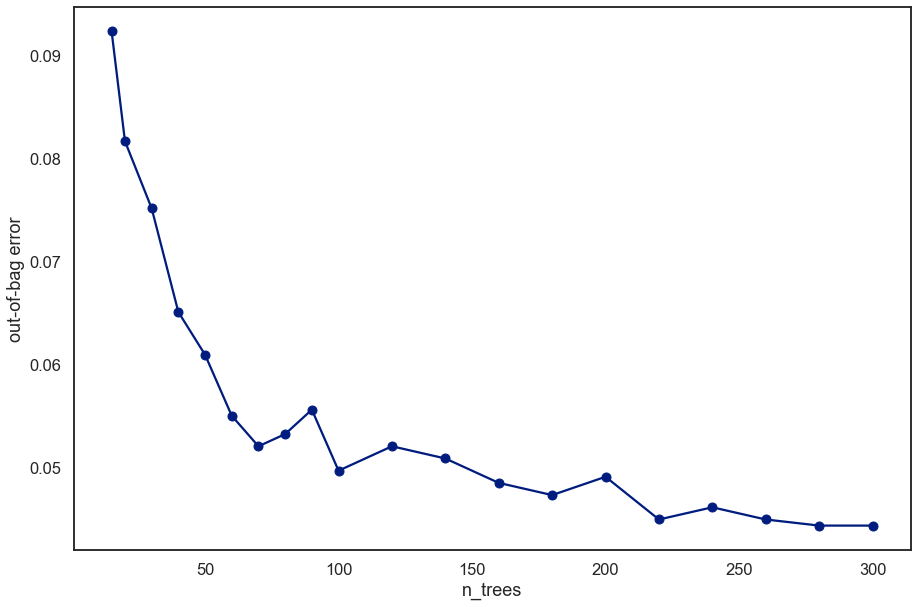

In [28]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
ef = ExtraTreesClassifier(oob_score=True, random_state=42, bootstrap=True, n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]:
    
    # Use this to set the number of trees
    ef.set_params(n_estimators=n_trees)
    ef.fit(X_train, y_train)

    # oob error
    oob_error = 1 - ef.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.124260
20.0,0.105325
30.0,0.087574
40.0,0.081657
50.0,0.074556
60.0,0.071006
70.0,0.071006
80.0,0.071006
90.0,0.072189


In [30]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.092308,0.124260
20.0,0.081657,0.105325
30.0,0.075148,0.087574
40.0,0.065089,0.081657
50.0,0.060947,0.074556
60.0,0.055030,0.071006
70.0,0.052071,0.071006
80.0,0.053254,0.071006
90.0,0.055621,0.072189


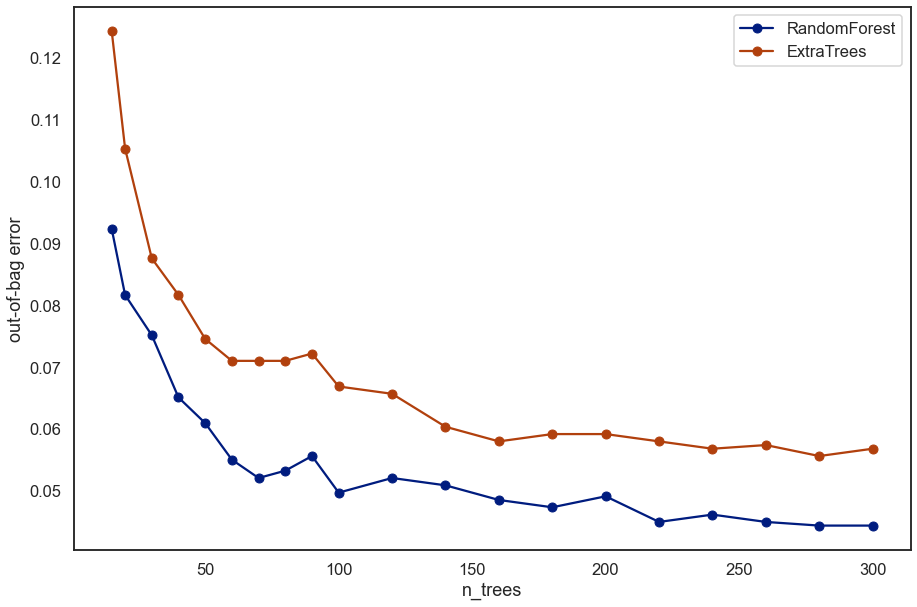

In [31]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

#### From the above results. The Random Forest with a estimator of 100 is better than the ExtraTree Classifier.

#### Setup other classifier to compare with each other how they perform in terms of accuracy.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm

lr = LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)

l2_lbfgs = LogisticRegressionCV(cv=4, penalty='l2', solver='lbfgs', random_state=42).fit(X_train, y_train)

l2_newton = LogisticRegressionCV(cv=4, penalty='l2', solver='newton-cg', random_state=42).fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

rf = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1,n_estimators=100).fit(X_train, y_train)

gnb = GaussianNB().fit(X_train, y_train)

sgd= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42).fit(X_train, y_train)

suvm = svm.SVC(kernel='linear', probability=True, random_state=42).fit(X_train, y_train)


C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [33]:
# Predict the class for each
y_pred = list()

coeff_labels = ['lr', 'l2_lbfgs', 'l2_newton-cg','dt', 'rf', 'gnb', 'sgd', 'suvm']
coeff_models = [lr, l2_lbfgs, l2_newton, dt, rf, gnb, sgd, suvm]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_pred

,lr,l2_lbfgs,l2_newton-cg,dt,rf,gnb,sgd,suvm
0,5,4,4,5,5,5,2,4
1,2,3,3,3,3,4,4,3
2,2,3,3,3,3,4,3,3
3,2,2,2,2,2,4,1,2
4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...
415,3,3,3,3,3,3,3,3
416,6,6,6,6,6,6,6,6
417,3,3,3,3,3,2,3,3
418,0,1,1,1,1,0,3,1


In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5,6]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5,6]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [35]:
metrics

,lr,l2_lbfgs,l2_newton-cg,dt,rf,gnb,sgd,suvm
precision,0.733781,0.964356,0.966890,0.919396,0.952751,0.640821,0.707889,0.938833
recall,0.740476,0.964286,0.966667,0.916667,0.947619,0.604762,0.692857,0.938095
fscore,0.732253,0.964045,0.966446,0.917097,0.948083,0.583812,0.689888,0.937827
accuracy,0.740476,0.964286,0.966667,0.916667,0.947619,0.604762,0.692857,0.938095
auc,0.848482,0.979211,0.980616,0.951450,0.969465,0.767626,0.821190,0.963982


In [36]:
for lab in coeff_labels:
    print(lab,'\n')
    print(classification_report(y_test, y_pred[lab]))

lr 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        54
           1       0.71      0.51      0.59        57
           2       0.58      0.57      0.57        58
           3       0.62      0.60      0.61        58
           4       0.64      0.59      0.61        70
           5       0.77      0.98      0.87        59
           6       0.98      0.98      0.98        64

    accuracy                           0.74       420
   macro avg       0.73      0.74      0.73       420
weighted avg       0.73      0.74      0.73       420

l2_lbfgs 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        57
           2       0.94      0.88      0.91        58
           3       0.93      0.95      0.94        58
           4       0.99      0.99      0.99        70
           5       0.95      0.97      0.96        59
        

#### Compare the confusion matrix of different classifier.

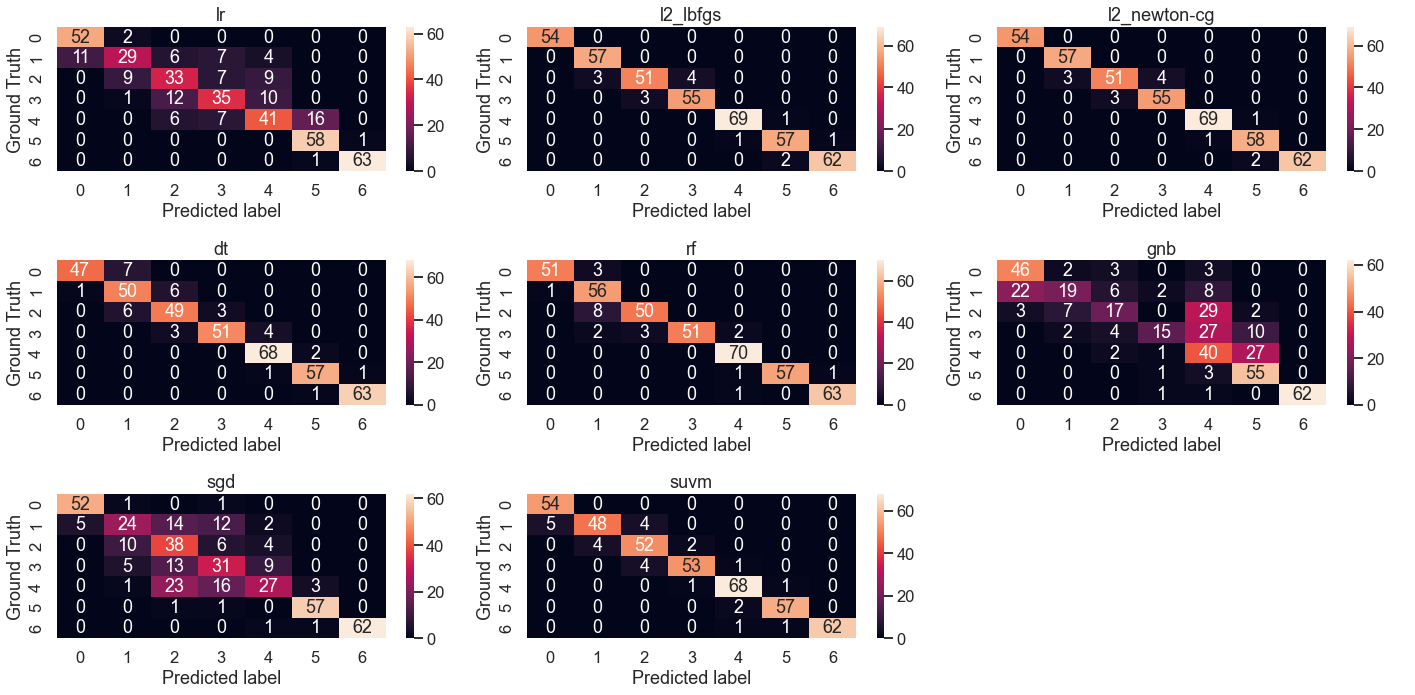

In [37]:
fig, axList = plt.subplots(nrows=3, ncols=3)
axList = axList.flatten()
fig.set_size_inches(20, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    ax.set_ylabel('Ground Truth')
    ax.set_xlabel('Predicted label')
plt.tight_layout()


#### Based on the metrics accuracy and auc and the confusion matrix, logictic regression CV with solver newton-cg and lbfgs and with penalty of l2, random forest classifier, decision tree classifier and support vector machine are quite close to each other. 

#### Feature Importance for Logistic Regression CV and Random Forest

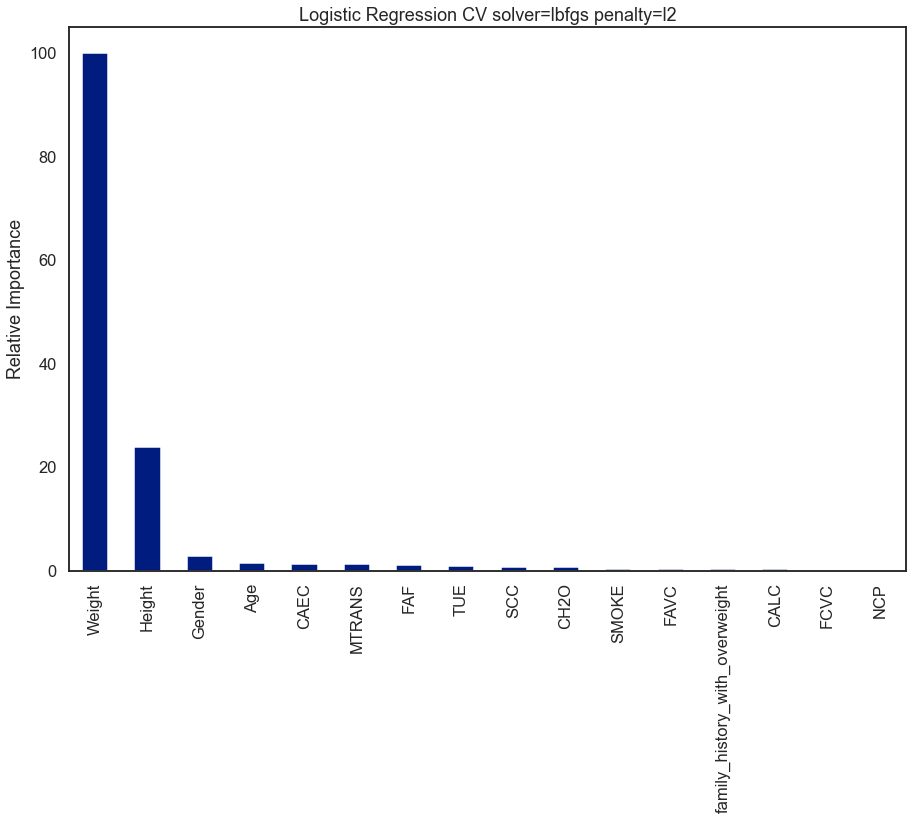

In [38]:
feature_imp = pd.Series(abs(l2_lbfgs.coef_[0])/max(abs(l2_lbfgs.coef_[0]))*100, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Logistic Regression CV solver=lbfgs penalty=l2')
ax.set(ylabel='Relative Importance');

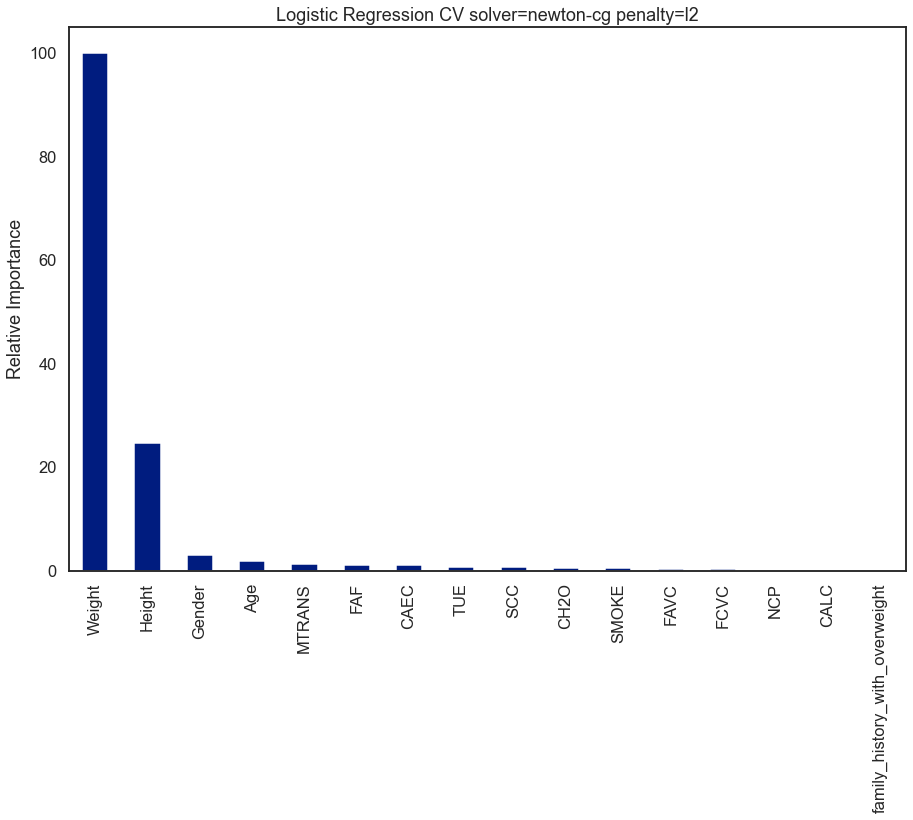

In [39]:
feature_imp = pd.Series(abs(l2_newton.coef_[0])/max(abs(l2_newton.coef_[0]))*100, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Logistic Regression CV solver=newton-cg penalty=l2')
ax.set(ylabel='Relative Importance');

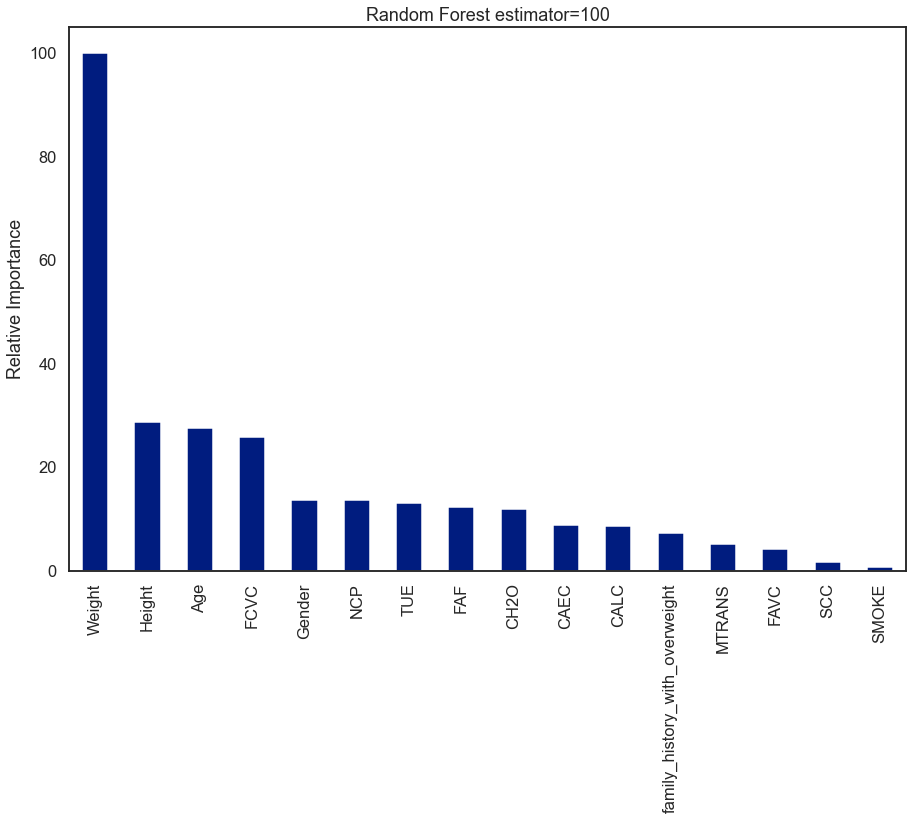

In [40]:
feature_imp = pd.Series(rf.feature_importances_/max(rf.feature_importances_)*100, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Random Forest estimator=100')
ax.set(ylabel='Relative Importance');

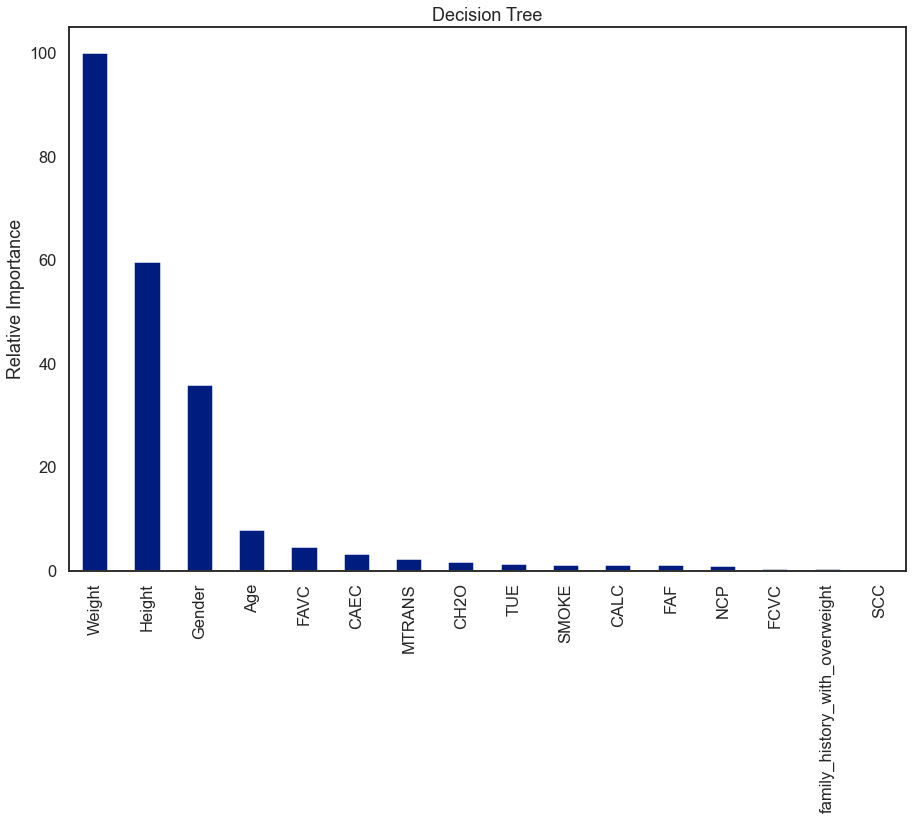

In [41]:
feature_imp = pd.Series(dt.feature_importances_/max(dt.feature_importances_)*100, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Decision Tree')
ax.set(ylabel='Relative Importance');

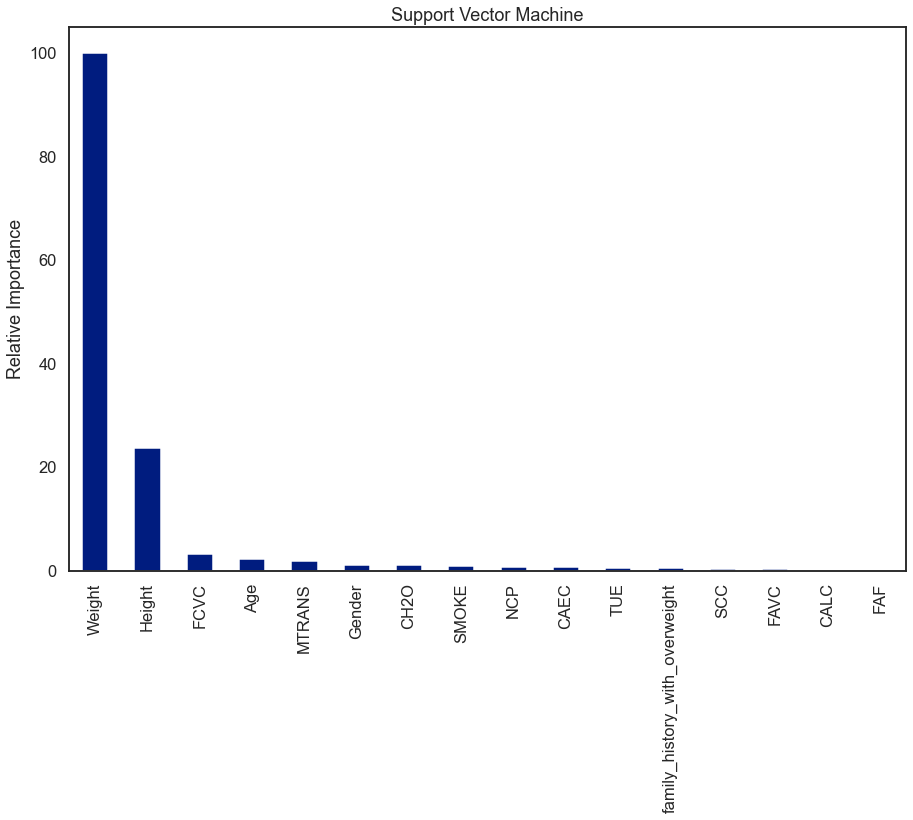

In [42]:
feature_imp = pd.Series(abs(suvm.coef_[0])/max(abs(suvm.coef_[0]))*100, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Support Vector Machine')
ax.set(ylabel='Relative Importance');

#### The feature importance for the above models are mostly concentrated to the feature weight. We will take out the weight feature in the dataframe df_2 and determine which is a better model.

In [43]:
df_2 = df_1.copy()

In [44]:
del df_2['Weight']
df_2

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,1
1,0,21.000000,1.520000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,1
2,1,23.000000,1.800000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,1
3,1,27.000000,1.800000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,2
4,1,22.000000,1.780000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0,20.976842,1.710730,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,6
2106,0,21.982942,1.748584,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,6
2107,0,22.524036,1.752206,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,6
2108,0,24.361936,1.739450,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,6


In [45]:
### preparing for machine learning part
feature_cols_2 = df_2.columns[:-1]
feature_cols_2

Index(['Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS'],
      dtype='object')

In [46]:
### Preparing train and test data

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=420, random_state=42)

# Get the index values from the generator
train_idx_2, test_idx_2 = next(strat_shuff_split.split(df_2[feature_cols_2], df_2['NObeyesdad']))

# Create the data sets
X_train_2 = df_2.loc[train_idx_2, feature_cols_2]
y_train_2 = df_2.loc[train_idx_2, 'NObeyesdad']

X_test_2 = df_2.loc[test_idx_2, feature_cols_2]
y_test_2 = df_2.loc[test_idx_2, 'NObeyesdad']

scale_2 = preprocessing.StandardScaler()
scale_2.fit(X_train_2)
X_train_2 = scale_2.transform(X_train_2)
X_test_2 = scale_2.transform(X_test_2)

In [47]:
### Setting up the classifiers

l2_lbfgs_2 = LogisticRegressionCV(cv=4, penalty='l2', solver='lbfgs', random_state=42).fit(X_train_2, y_train_2)

l2_newton_2 = LogisticRegressionCV(cv=4, penalty='l2', solver='newton-cg', random_state=42).fit(X_train_2, y_train_2)

dt_2 = DecisionTreeClassifier(random_state=42).fit(X_train_2, y_train_2)

rf_2 = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1,n_estimators=100).fit(X_train_2, y_train_2)

suvm_2 = svm.SVC(kernel='linear', probability=True, random_state=42).fit(X_train_2, y_train_2)

C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [48]:
# Predict the class and the probability for each
y_pred_2 = list()

coeff_labels_2 = ['l2_lbfgs', 'l2_newton-cg','dt', 'rf', 'suvm']
coeff_models_2 = [l2_lbfgs_2, l2_newton_2, dt_2, rf_2, suvm_2]

for lab_2,mod_2 in zip(coeff_labels_2, coeff_models_2):
    y_pred_2.append(pd.Series(mod_2.predict(X_test_2), name=lab_2))

y_pred_2 = pd.concat(y_pred_2, axis=1)

y_pred_2

,l2_lbfgs,l2_newton-cg,dt,rf,suvm
0,5,5,4,5,5
1,4,4,3,2,2
2,2,2,3,3,2
3,5,5,5,2,4
4,5,5,4,4,4
...,...,...,...,...,...
415,0,0,3,3,3
416,6,6,6,6,6
417,3,3,3,1,1
418,4,4,0,1,1


In [49]:
metrics_2 = list()
cm_2 = dict()

for lab_2 in coeff_labels_2:

    # Preciision, recall, f-score from the multi-class support function
    precision_2, recall_2, fscore_2, _ = score(y_test_2, y_pred_2[lab_2], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy_2 = accuracy_score(y_test_2, y_pred_2[lab_2])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc_2 = roc_auc_score(label_binarize(y_test_2, classes=[0,1,2,3,4,5,6]),
              label_binarize(y_pred_2[lab_2], classes=[0,1,2,3,4,5,6]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_2[lab_2] = confusion_matrix(y_test_2, y_pred_2[lab_2])
    
    metrics_2.append(pd.Series({'precision':precision_2, 'recall':recall_2, 
                              'fscore':fscore_2, 'accuracy':accuracy_2,
                              'auc':auc_2}, 
                             name=lab_2))

metrics_2 = pd.concat(metrics_2, axis=1)

In [50]:
metrics_2

,l2_lbfgs,l2_newton-cg,dt,rf,suvm
precision,0.572389,0.573608,0.774621,0.880833,0.637633
recall,0.576190,0.576190,0.771429,0.869048,0.638095
fscore,0.564215,0.564750,0.771039,0.870982,0.630123
accuracy,0.576190,0.576190,0.771429,0.869048,0.638095
auc,0.752236,0.752275,0.866624,0.923933,0.789248


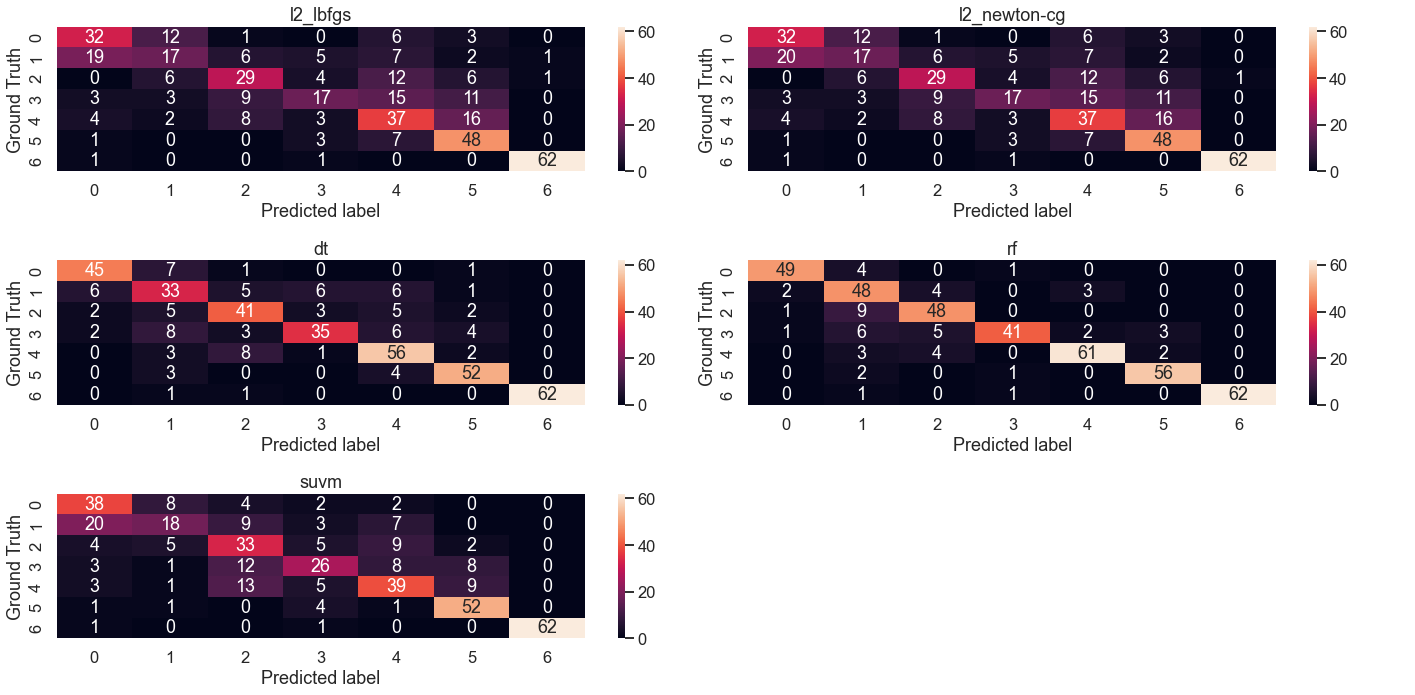

In [51]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(20, 10)

axList[-1].axis('off')

for ax,lab_2 in zip(axList[:-1], coeff_labels_2):
    sns.heatmap(cm_2[lab_2], ax=ax, annot=True, fmt='d');
    ax.set(title=lab_2);
    ax.set_ylabel('Ground Truth')
    ax.set_xlabel('Predicted label')
plt.tight_layout()

In [52]:
for lab_2 in coeff_labels_2:
    print(lab_2,'\n')
    print(classification_report(y_test_2, y_pred_2[lab_2]))

l2_lbfgs 

              precision    recall  f1-score   support

           0       0.53      0.59      0.56        54
           1       0.42      0.30      0.35        57
           2       0.55      0.50      0.52        58
           3       0.52      0.29      0.37        58
           4       0.44      0.53      0.48        70
           5       0.56      0.81      0.66        59
           6       0.97      0.97      0.97        64

    accuracy                           0.58       420
   macro avg       0.57      0.57      0.56       420
weighted avg       0.57      0.58      0.56       420

l2_newton-cg 

              precision    recall  f1-score   support

           0       0.52      0.59      0.56        54
           1       0.42      0.30      0.35        57
           2       0.55      0.50      0.52        58
           3       0.52      0.29      0.37        58
           4       0.44      0.53      0.48        70
           5       0.56      0.81      0.66        5

#### Based on the metrics results of accuracy and auc, the random forest and decision tree comes better. If we look at the feature importance on the previous results, both decision tree and random forest has a more balance feature to determine the class. So when we remove the feature (weight), the results is very comparable to the results that has feature weight on it. 

#### Based on the results of AUC, confusion matrix and accuray, the Random Forest performs better among the rest.

#### Below show the new feature importance of the model without the feature weights.

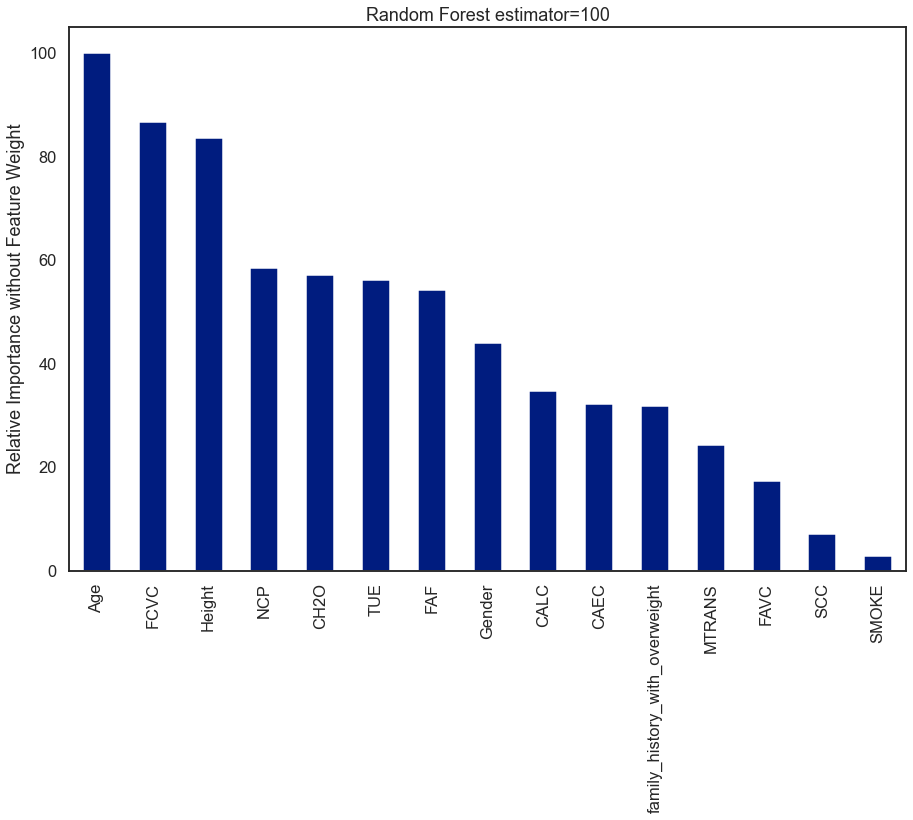

In [53]:
feature_imp = pd.Series(rf_2.feature_importances_/max(rf_2.feature_importances_)*100, index=feature_cols_2).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Random Forest estimator=100')
ax.set(ylabel='Relative Importance without Feature Weight');

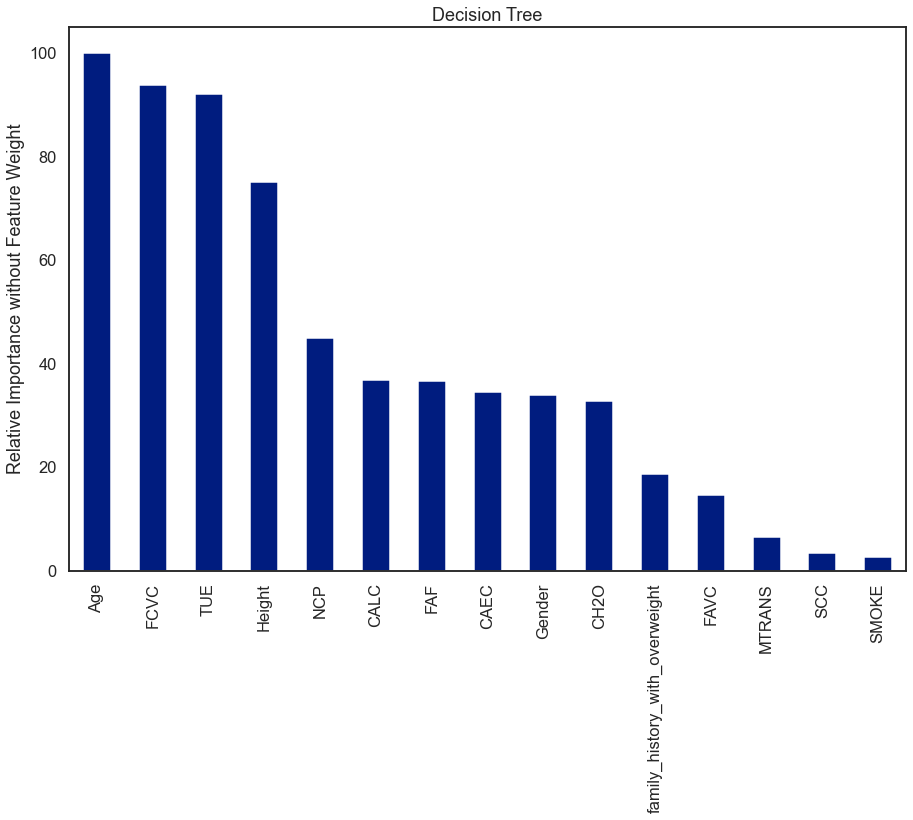

In [54]:
feature_imp = pd.Series(dt_2.feature_importances_/max(dt_2.feature_importances_)*100, index=feature_cols_2).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Decision Tree')
ax.set(ylabel='Relative Importance without Feature Weight');

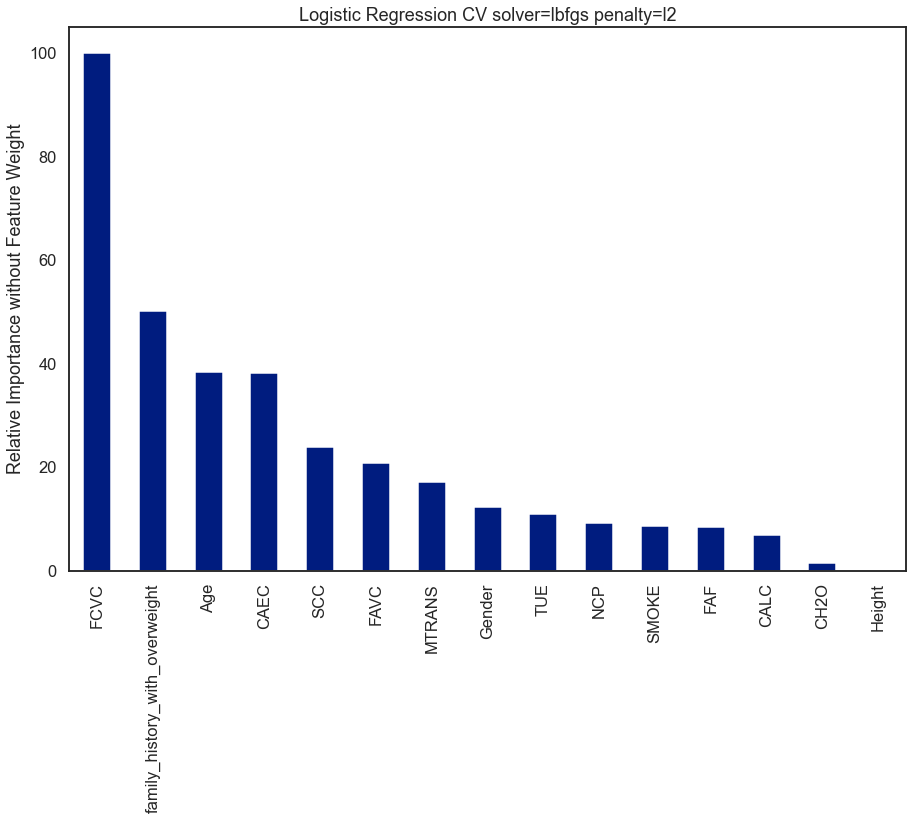

In [55]:
feature_imp = pd.Series(abs(l2_lbfgs_2.coef_[0])/max(abs(l2_lbfgs_2.coef_[0]))*100, index=feature_cols_2).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Logistic Regression CV solver=lbfgs penalty=l2')
ax.set(ylabel='Relative Importance without Feature Weight');

### Grid search for the Random Forest classifier

#### Grid Search the original train data with feature weight.

In [56]:
from sklearn.model_selection import GridSearchCV

parameters= {'n_estimators':[100,150,200], 'criterion':['gini','entropy'], 'class_weight':['balanced', 'balanced_subsample', None], 
             'bootstrap':[True,False]}
rf_gs = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)
clf = GridSearchCV(rf_gs, parameters)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_m

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_class_weight',
 'param_criterion',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [57]:
clf.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'n_estimators': 100}

#### Grid Search the train data without the feature weight

In [58]:
parameters= {'n_estimators':[100,150,200], 'criterion':['gini','entropy'], 'class_weight':['balanced', 'balanced_subsample', None], 
             'bootstrap':[True,False]}
rf_2_gs = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)
clf_2 = GridSearchCV(rf_2_gs, parameters)
clf_2.fit(X_train_2, y_train_2)
sorted(clf_2.cv_results_.keys())

C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mansion\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_m

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_class_weight',
 'param_criterion',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [59]:
clf_2.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'n_estimators': 100}

#### Preparing the final classifier and comparing the original setting with the best parameter setting on Grid Search

In [60]:
rf = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1, bootstrap=True, class_weight=None,
                               criterion='gini', n_estimators=100).fit(X_train, y_train)

rf_gs = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1, bootstrap=True, class_weight='balanced_subsample',
                               criterion='entropy', n_estimators=100).fit(X_train, y_train)

rf_2 = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1, bootstrap=True, class_weight=None,
                               criterion='gini', n_estimators=100).fit(X_train_2, y_train_2)

rf_2_gs = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1, bootstrap=True, class_weight='balanced_subsample',
                                 criterion='entropy', n_estimators=100).fit(X_train_2, y_train_2)

#### For the train data with feature weight

In [61]:
y_pred_s1 = list()

coeff_labels_s1 = ['rf', 'rf_gs']
coeff_models_s1 = [rf, rf_gs]

for lab_s1,mod_s1 in zip(coeff_labels_s1, coeff_models_s1):
    y_pred_s1.append(pd.Series(mod_s1.predict(X_test), name=lab_s1))
    
y_pred_s1 = pd.concat(y_pred_s1, axis=1)
y_pred_s1

,rf,rf_gs
0,5,5
1,3,2
2,3,3
3,2,2
4,4,4
...,...,...
415,3,3
416,6,6
417,3,3
418,1,1


In [62]:
metrics_s1 = list()
cm_s1 = dict()

for lab_s1 in coeff_labels_s1:

    # Preciision, recall, f-score from the multi-class support function
    precision_s1, recall_s1, fscore_s1, _ = score(y_test, y_pred_s1[lab_s1], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy_s1 = accuracy_score(y_test, y_pred_s1[lab_s1])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc_s1 = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5,6]),
              label_binarize(y_pred_s1[lab_s1], classes=[0,1,2,3,4,5,6]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_s1[lab_s1] = confusion_matrix(y_test, y_pred_s1[lab_s1])
    
    metrics_s1.append(pd.Series({'precision':precision_s1, 'recall':recall_s1, 
                              'fscore':fscore_s1, 'accuracy':accuracy_s1,
                              'auc':auc_s1}, 
                             name=lab_s1))

metrics_s1 = pd.concat(metrics_s1, axis=1)

In [63]:
metrics_s1

,rf,rf_gs
precision,0.952751,0.947187
recall,0.947619,0.942857
fscore,0.948083,0.943314
accuracy,0.947619,0.942857
auc,0.969465,0.966714


In [64]:
for lab_s1 in coeff_labels_s1:
    print(lab_s1,'\n')
    print(classification_report(y_test, y_pred_s1[lab_s1]))

rf 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.81      0.98      0.89        57
           2       0.94      0.86      0.90        58
           3       1.00      0.88      0.94        58
           4       0.95      1.00      0.97        70
           5       1.00      0.97      0.98        59
           6       0.98      0.98      0.98        64

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420

rf_gs 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.81      0.95      0.87        57
           2       0.94      0.86      0.90        58
           3       1.00      0.88      0.94        58
           4       0.95      1.00      0.97        70
           5       0.98      0.97      0.97        59
           

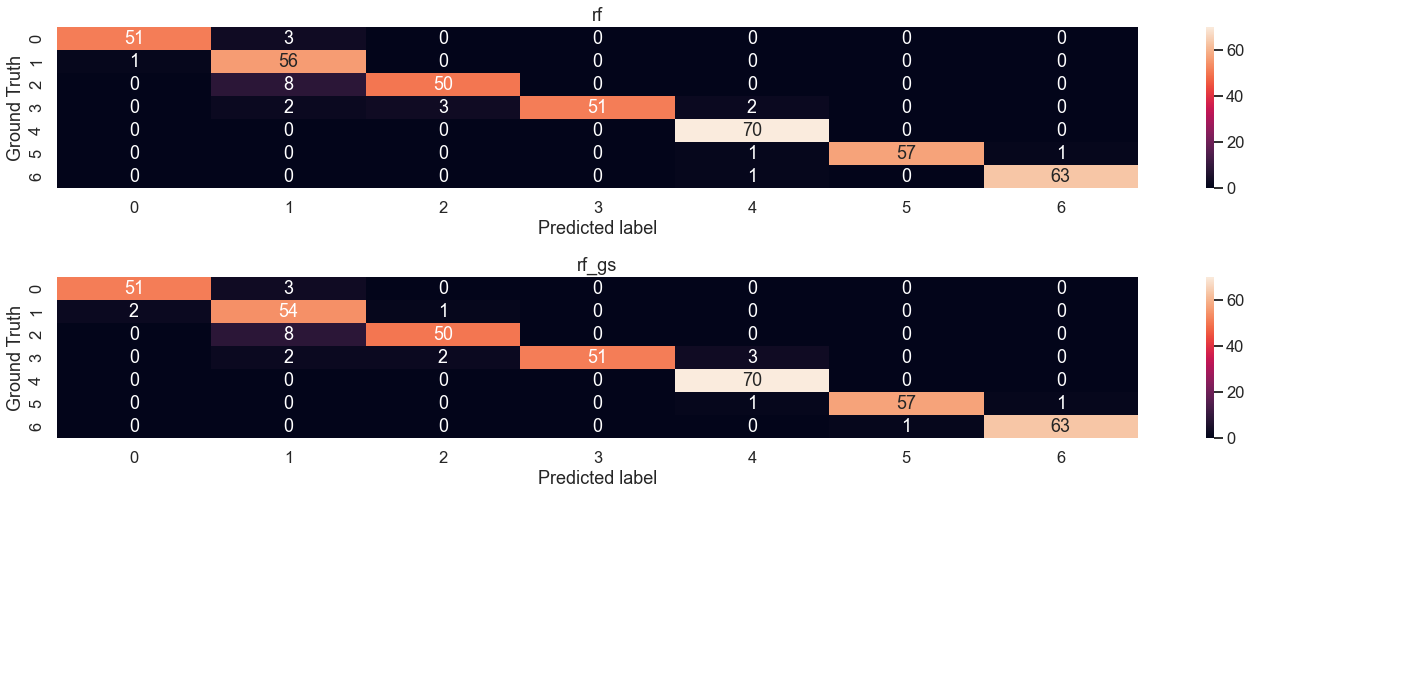

In [65]:
fig, axList = plt.subplots(nrows=3, ncols=1)
axList = axList.flatten()
fig.set_size_inches(20, 10)

axList[-1].axis('off')

for ax,lab_s1 in zip(axList[:-1], coeff_labels_s1):
    sns.heatmap(cm_s1[lab_s1], ax=ax, annot=True, fmt='d');
    ax.set(title=lab_s1);
    ax.set_ylabel('Ground Truth')
    ax.set_xlabel('Predicted label')
plt.tight_layout()

### The original setting of the model seems to perfrom a bit better than with best parameter of Grid Search

#### For the train data without feature weight

In [66]:
y_pred_s2 = list()

coeff_labels_s2 = ['rf_2', 'rf_2_gs']
coeff_models_s2 = [rf_2, rf_2_gs]

for lab_s2,mod_s2 in zip(coeff_labels_s2, coeff_models_s2):
    y_pred_s2.append(pd.Series(mod_s2.predict(X_test_2), name=lab_s2))
    
y_pred_s2 = pd.concat(y_pred_s2, axis=1)
y_pred_s2

,rf_2,rf_2_gs
0,5,3
1,2,2
2,3,3
3,2,2
4,4,4
...,...,...
415,3,3
416,6,6
417,1,1
418,1,1


In [67]:
metrics_s2 = list()
cm_s2 = dict()

for lab_s2 in coeff_labels_s2:

    # Preciision, recall, f-score from the multi-class support function
    precision_s2, recall_s2, fscore_s2, _ = score(y_test_2, y_pred_s2[lab_s2], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy_s2 = accuracy_score(y_test_2, y_pred_s2[lab_s2])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc_s2 = roc_auc_score(label_binarize(y_test_2, classes=[0,1,2,3,4,5,6]),
              label_binarize(y_pred_s2[lab_s2], classes=[0,1,2,3,4,5,6]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_s2[lab_s2] = confusion_matrix(y_test_2, y_pred_s2[lab_s2])
    
    metrics_s2.append(pd.Series({'precision':precision_s2, 'recall':recall_s2, 
                              'fscore':fscore_s2, 'accuracy':accuracy_s2,
                              'auc':auc_s2}, 
                             name=lab_s2))

metrics_s2 = pd.concat(metrics_s2, axis=1)

In [68]:
metrics_s2

,rf_2,rf_2_gs
precision,0.880833,0.864882
recall,0.869048,0.854762
fscore,0.870982,0.856640
accuracy,0.869048,0.854762
auc,0.923933,0.915520


In [69]:
for lab_s2 in coeff_labels_s2:
    print(lab_s2,'\n')
    print(classification_report(y_test_2, y_pred_s2[lab_s2]))

rf_2 

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.66      0.84      0.74        57
           2       0.79      0.83      0.81        58
           3       0.93      0.71      0.80        58
           4       0.92      0.87      0.90        70
           5       0.92      0.95      0.93        59
           6       1.00      0.97      0.98        64

    accuracy                           0.87       420
   macro avg       0.88      0.87      0.87       420
weighted avg       0.88      0.87      0.87       420

rf_2_gs 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.64      0.84      0.73        57
           2       0.81      0.79      0.80        58
           3       0.85      0.69      0.76        58
           4       0.90      0.87      0.88        70
           5       0.92      0.92      0.92        59
       

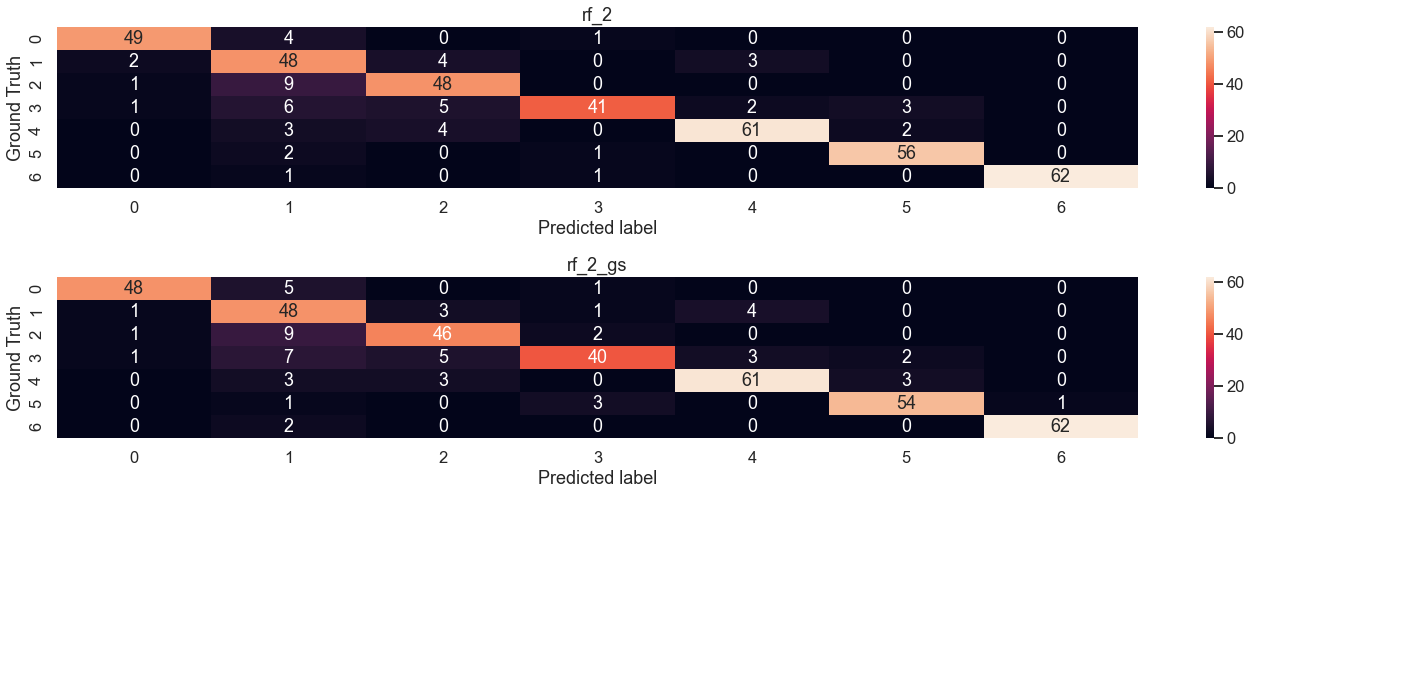

In [70]:
fig, axList = plt.subplots(nrows=3, ncols=1)
axList = axList.flatten()
fig.set_size_inches(20, 10)

axList[-1].axis('off')

for ax,lab_s2 in zip(axList[:-1], coeff_labels_s2):
    sns.heatmap(cm_s2[lab_s2], ax=ax, annot=True, fmt='d');
    ax.set(title=lab_s2);
    ax.set_ylabel('Ground Truth')
    ax.set_xlabel('Predicted label')
plt.tight_layout()

### The original setting of the model seems to perfrom a bit better than with best parameter of Grid Search

## Final Setting of the model with and without feature weight is shown below:

#### RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1, bootstrap=True, class_weight=None, criterion='gini', n_estimators=100)
                               

### Plotting the AUC with Feature Weight.
#### Note: The output may not be same as above metrics as it is due to the y output was label binarize

(1690, 7)
7
0.9951426836672739
0.9865883717558359
0.9862354734235093
0.9971184987616689
0.998938775510204
0.9997182966336448
0.9999561095505618


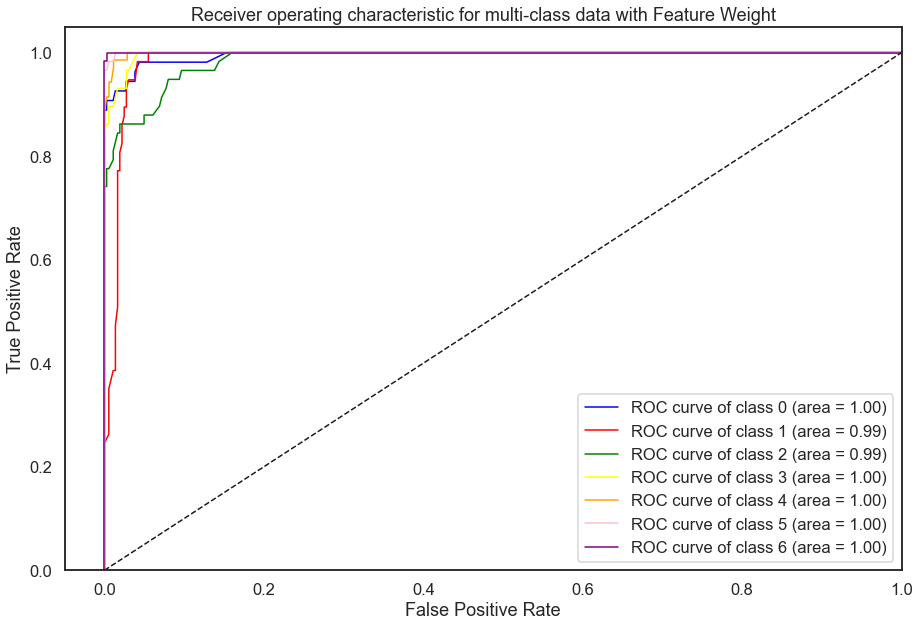

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Create the data sets
X_train = df_1.loc[train_idx, feature_cols]
y_train = df_1.loc[train_idx, 'NObeyesdad']
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
print(y_train.shape)
n_classes = y_train.shape[1]
print(n_classes)
X_test = df_1.loc[test_idx, feature_cols]
y_test = df_1.loc[test_idx, 'NObeyesdad']
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

classifier = OneVsRestClassifier(RandomForestClassifier(oob_score=True, random_state=42, 
                                                        n_jobs=-1, bootstrap=True, class_weight=None, 
                                                        criterion='gini', n_estimators=100))

y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data with Feature Weight')
plt.legend(loc="lower right")
plt.show()

### Plotting the AUC without Feature Weight

(1690, 7)
7
0.9919044727787898
0.9617466531342129
0.9583730234330349
0.9691607925319109
0.9817346938775511
0.9889431428705573
0.9953037219101124


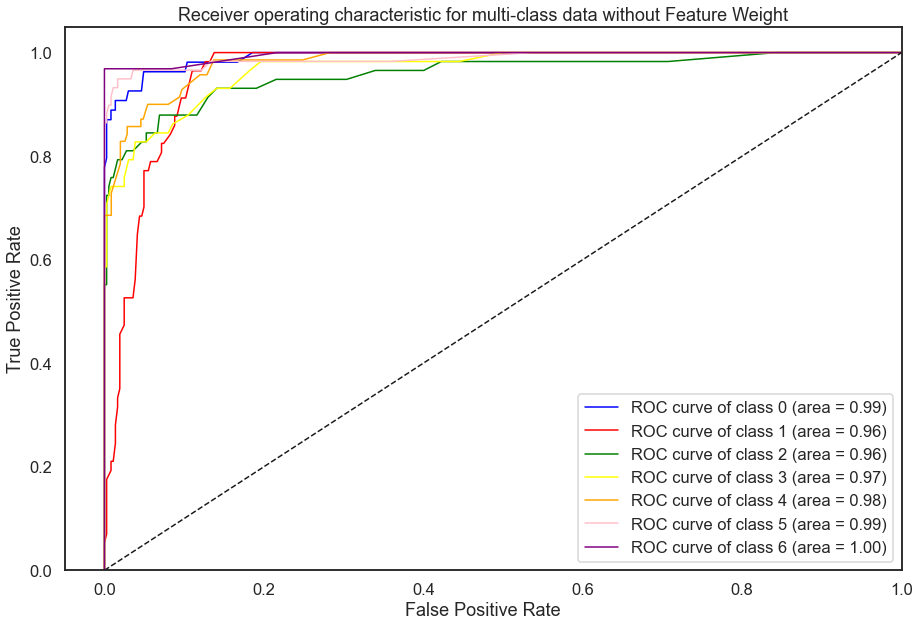

In [72]:
# Create the data sets
y_train_2 = label_binarize(y_train_2, classes=[0, 1, 2, 3, 4, 5, 6])
print(y_train_2.shape)
n_classes = y_train_2.shape[1]
print(n_classes)
y_test_2 = label_binarize(y_test_2, classes=[0, 1, 2, 3, 4, 5, 6])

classifier_2 = OneVsRestClassifier(RandomForestClassifier(oob_score=True, random_state=42, 
                                                        n_jobs=-1, bootstrap=True, class_weight=None, 
                                                        criterion='gini', n_estimators=100))

y_score = classifier_2.fit(X_train_2, y_train_2).predict_proba(X_test_2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data without Feature Weight')
plt.legend(loc="lower right")
plt.show()

### The AUC have some difference between the plotting and the metrics is due to y_train/test data use for metrics is categorize into one column only. While the plotting, the y_train/test was label binarize. So in effect the y_train/test have 7 columns (7 class). But results between with and without weight as feature shows some effect to the AUC results.

# Conclusion:

### This data set can easily be classify by using the Random Forest Classifier. Even though, the class we are predicting is related to weight, the feature weight can be remove and still the predicted category results is reasonable as compare with feature weight on it.